# Binary Classification Using Logistic Regression

+ Author: Casey Whorton
+ Last edited: 1/12/2021

**Purpose:** This notebook showcases a simple binary classification problem and how it can be solved analytically without the use of an algorithm, and the results plotted with explanation.

**Description:** We look at two clusters of observations, both with a bivariate normal distribution. One of the clusters is class 0, or "Negative" and the other is class 1, or "Positive". Visually, we can detect where to draw a line to separate these two classes, but we want a solution using the data from the two distributions. We'll use the results of _this derivation_ as the solution of the weights to be applied in a sigmoid function that predicts the probability of falling into the "Positive" class, (class 1).

## Import Packages

In [160]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

## Problem Statement

Using the bivariate means and covariate matrices, find a discriminating line that separates the two classes of observations on a 2-d plane and plot it.

## Plot the Data

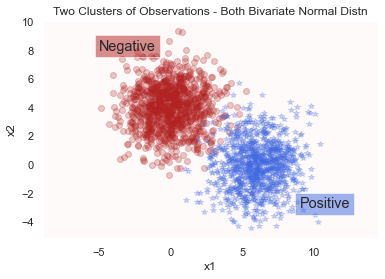

In [161]:
sns.set(rc={'axes.facecolor':'snow'})
mean1 = [0, 4]
cov1 = [[2.5, 0], [0, 2.5]]  # diagonal covariance


x, y = np.random.multivariate_normal(mean1, cov1, 1000).T
plt.plot(x, y, 'o',alpha=0.25, color = 'firebrick')
plt.axis('equal')

mean2 = [6, 0]
cov2 = [[2.5, 0], [0, 2.5]]  # diagonal covariance


x, y = np.random.multivariate_normal(mean2, cov2, 1000).T
plt.plot(x, y, '*',alpha=0.25, color = 'royalblue')

plt.text(-5,8,'Negative',size='large', bbox=dict(facecolor='firebrick', alpha=0.5))
plt.text(9,-3,'Positive',size='large', bbox=dict(facecolor='royalblue', alpha=0.5))
plt.grid(False)
plt.xlabel('x1')
plt.ylabel('x2')
plt.title('Two Clusters of Observations - Both Bivariate Normal Distn')

plt.show()

## Solving for Weights and Discriminant Line

Since both covariance matrices are equal, calculating the weights to separate the two classes has an analytic solution, which can be derived (after some matrix manipulation).  Refer to this derivation to see how this solution was calculated.

In [162]:
weights = np.dot(np.array(mean2).T - np.array(mean1).T,np.linalg.inv(cov1))

w2 = weights[0]
w1 = weights[1]

Now that we have the weights associated with our two features, x1 and x2, we can define what discriminates between the two classes.

By setting the dot product equal to 0, we can find a line to be plotted that discriminates between the two classes and plot it in the 2d plane.

$$ (w^T \cdot x + b) = 0, $$

$$0 = (w_1*x_1 + w_2*x_2)$$

$$x2 = -\frac{w_1*x_1}{w_2}$$

## Predicted Probabilities

The predicted probability for each observation is returned by passing the weights, features, and bias to the sigmoid function.

$$P(Y=1|X) = \frac{1}{1 + e^{-(w^T \cdot x + b)}}$$

In [163]:
# X_mat is the design matrix
# first 1000 observations are from one distribution, the second 1000 observations are from another distribution

x1, y1 = np.random.multivariate_normal(mean1, cov1, 1000).T
x2, y2 = np.random.multivariate_normal(mean2, cov2, 1000).T

x = np.array([x1,x2]).flatten()
y = np.array([y1,y2]).flatten()

X_mat = np.stack([np.ones(2000),x,y],axis=1)

In [167]:
# weights from solution

w = [0, w1, w2]

# predicted probabilities from the sigmoid function

predictions = (1/(1+np.exp(X_mat.dot(w))))

# actual classes (0 for Negative, 1 for Positive)

actuals = [0]*1000+[1]*1000

In [169]:
# results dataframe 

results_df = pd.concat([pd.DataFrame(X_mat),pd.DataFrame(predictions),pd.DataFrame(actuals)],axis=1)
results_df.columns = ['bias','x1','x2','prediction','actual']
results_df.head()

,bias,x1,x2,prediction,actual
0,1.0,-1.383595,3.169572,5.431123e-05,0
1,1.0,-0.576110,2.900119,3.773110e-04,0
2,1.0,-1.210284,5.000687,8.846233e-07,0
3,1.0,-0.304361,6.431071,1.217193e-07,0
4,1.0,-2.258896,8.095390,9.828318e-11,0


## Plot Solution

Dots nearest to the discriminating line have predicted probabilities closer to 0.5.

C:\Users\casey\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


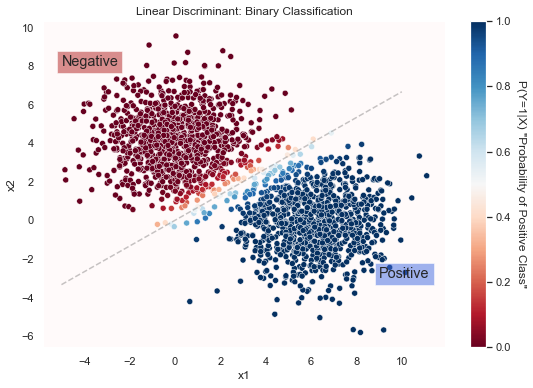

In [159]:
plt.figure(figsize=(9,6))

ax = sns.scatterplot('x1','x2',data = results_df,hue = 'prediction',palette='RdBu')

norm = plt.Normalize(results_df['prediction'].min(), results_df['prediction'].max())
sm = plt.cm.ScalarMappable(cmap="RdBu", norm=norm)
sm.set_array([])

# Remove the legend and add a colorbar
ax.get_legend().remove()
cbar = ax.figure.colorbar(sm)
cbar.ax.get_yaxis().labelpad = 15
cbar.ax.set_ylabel('P(Y=1|X) "Probability of Positive Class"',rotation=270)
plt.grid(False)
plt.plot(np.linspace(-5,10,10),(-w1*np.linspace(-5,10,10)/w2),linestyle='--',color='k',alpha=0.25)

plt.title('Linear Discriminant: Binary Classification')
plt.text(-5,8,'Negative',size='large', bbox=dict(facecolor='firebrick', alpha=0.5))
plt.text(9,-3,'Positive',size='large', bbox=dict(facecolor='royalblue', alpha=0.5))

plt.show()

# End